In [20]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from scipy import stats

In [21]:
df = pd.read_csv('tiempos.txt', sep=' ')

print(df.describe())
print(df.tail(11))


          Atleta  tiempo_sol  tiempo_nublado  tiempo_lluvia
count  12.000000   12.000000       12.000000      12.000000
mean    6.500000   13.908333       13.866667      33.158333
std     3.605551    2.025949        1.789024      49.079332
min     1.000000   11.000000       11.300000      18.200000
25%     3.750000   12.150000       12.475000      18.775000
50%     6.500000   14.400000       14.100000      19.050000
75%     9.250000   15.350000       14.950000      19.250000
max    12.000000   17.000000       16.700000     189.000000
    Atleta  tiempo_sol  tiempo_nublado  tiempo_lluvia
1        2        13.0            12.8           18.2
2        3        16.1            16.0           19.0
3        4        14.5            14.1           18.9
4        5        12.0            12.5           19.1
5        6        11.0            11.6           18.7
6        7        15.1            14.6          189.0
7        8        14.4            14.2           19.9
8        9        16.1      

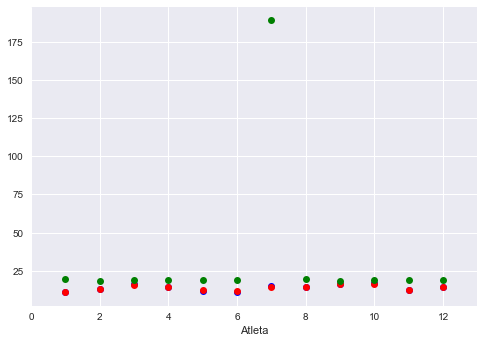

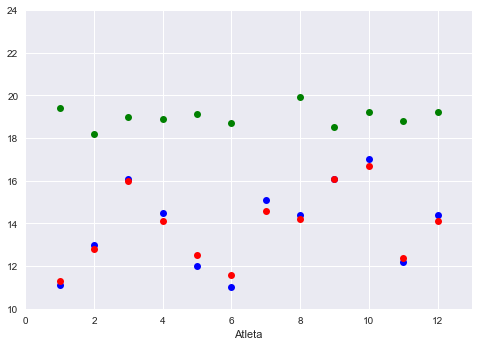

In [22]:
sns.tsplot(time=df['Atleta'], data=df['tiempo_sol'], interpolate=False, color="blue")
sns.tsplot(time=df['Atleta'], data=df['tiempo_nublado'], interpolate=False, color="red")
sns.tsplot(time=df['Atleta'], data=df['tiempo_lluvia'], interpolate=False, color="green")
sns.plt.show()

sns.tsplot(time=df['Atleta'], data=df['tiempo_sol'], interpolate=False, color="blue")
sns.tsplot(time=df['Atleta'], data=df['tiempo_nublado'], interpolate=False, color="red")
sns.tsplot(time=df['Atleta'], data=df['tiempo_lluvia'], interpolate=False, color="green")
sns.plt.ylim((10,24))
sns.plt.show()


In [ ]:
# Vamos a ver si los atletas son m´as lentos en d´ıas de lluvia que en dias soleados.